<a href="https://colab.research.google.com/github/Samikshab99/ML-Classcification-Cardiovascular-Risk-Prediction/blob/main/ML_Classification%3DCardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>  **Project Title:Cardiovascular Risk Prediction**<b><u>

---





### **Problem Description**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.



### **Data Description**:
**Demographic**:
*   Sex: male or female("M" or "F")
*   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral:**
*   is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous)
*   Predict variable (desired target)
*   10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV


---






















Exploration of data in data science is as important as the age of exploration (discovery) was for geography, history, science and humanity. Age of exploration seeded the idea of globalization in true sense. Today one of the major challenges faced by the global world is terrorism.

With access to The Global Terrorism Database our first task is to explore the data to really understand it and try to learn from it. We really dont know what we gonna find out but, we very excited!

So here go !

# Lets begin with rituals !

In [ ]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the csv file containing data
data=pd.read_csv('/content/drive/MyDrive/Supervised ML- Classification/data_cardiovascular_risk.csv',encoding="ISO-8859-1")

In [ ]:
# As we have the data now, lets see what's in it.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## 17 columns of data with with acronymed headers.
## Looks like we need to read all  column names try to figure out what data they are really storing.

In [ ]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dropping the id column
data.drop(columns=['id'], inplace=True)

In [ ]:
# Basic
data.shape

(3390, 16)

In [ ]:
# Thats a lot of data
data.size

54240

In [ ]:
# This is supposed to show first 5 rows of dataframe.
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# Looking up for the detailed description of our dataset.
data.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Checking min and max, All data points are in valid range.

Now let's go ahead and check for the missing values in rest of the dataset.

In [ ]:
# Missing data counts and percentage
missing = data.columns[data.isnull().any()].tolist()

print('Missing Data Count')
print(data[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(data[missing].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  data[col] = data[col].fillna(data[col].median())

# **Exploratory Data Analysis**

In [ ]:
# Lets check the discrete and continuous features
categorical_features = [i for i in data.columns if data[i].nunique()<=4]
numeric_features = [i for i in data.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### **Handling Outliers**

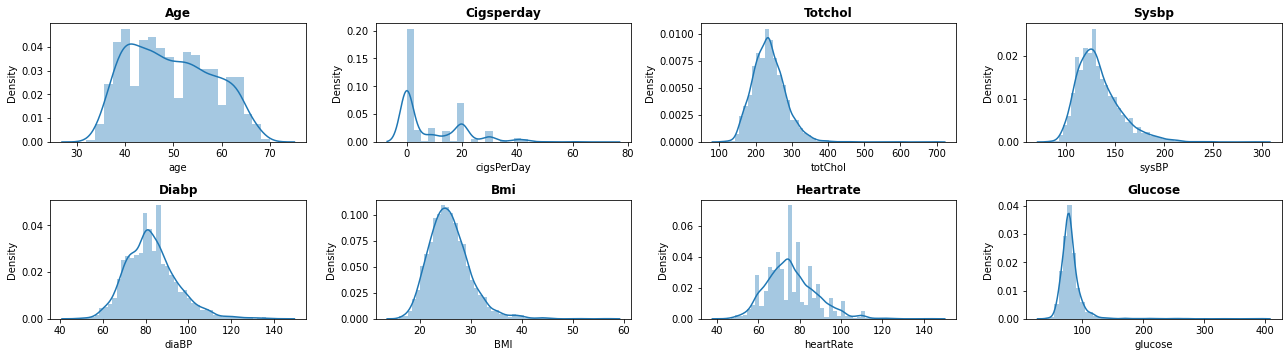

In [ ]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

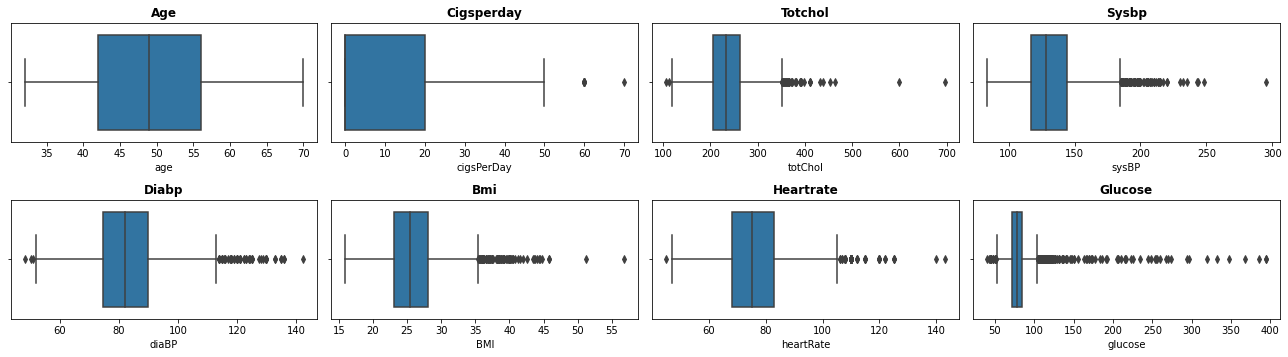

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

We can clearly see outliers in some columns. We treated it by replacing them with  the median values. 


IQR method of identifying outliers is to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers.

In [ ]:
# Removing outliers by standard methods and Plotting graphs:
df = data.copy()
for col in numeric_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,df[col]))

## Lets visualize the plots of each feature before and after the outlier treatment:

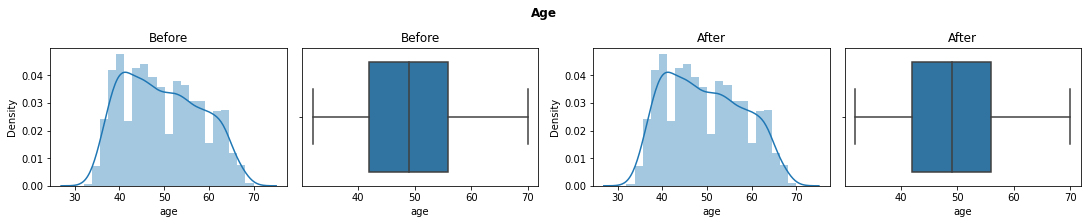

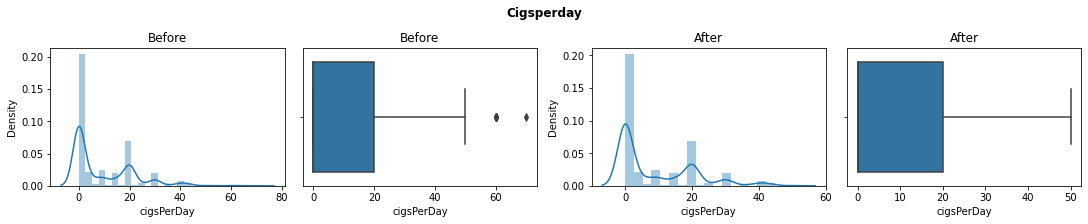

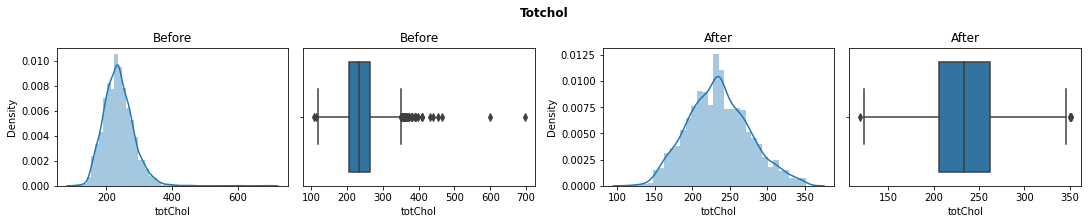

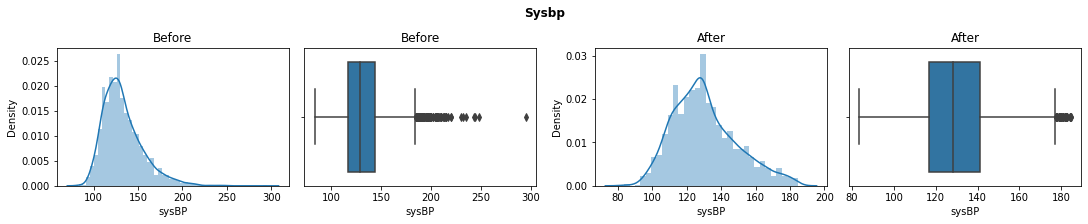

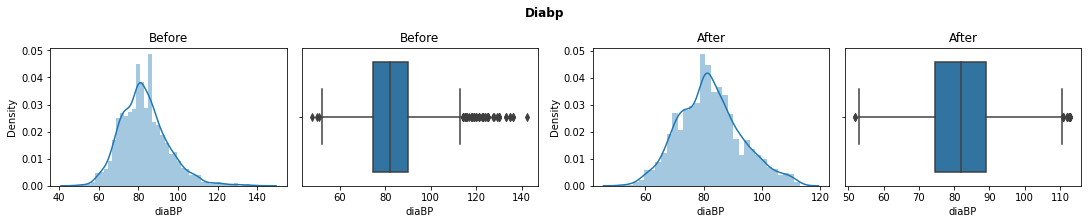

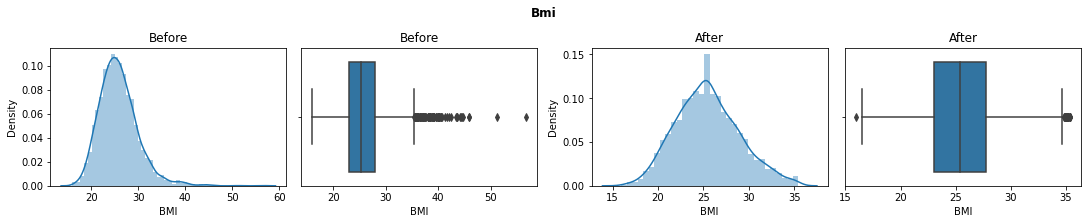

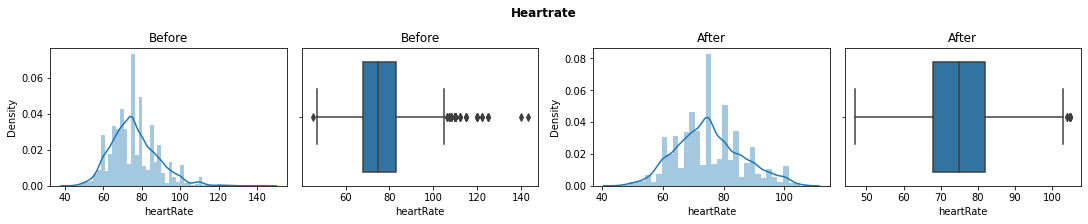

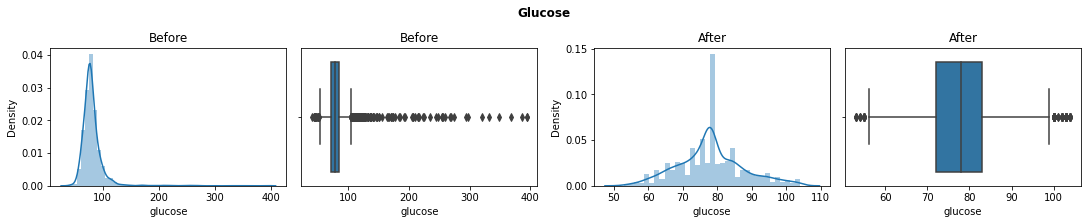

In [ ]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(data[col], ax=ax[0]).set(title="Before")
  sns.boxplot(data[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

### **Cleaning and Manipulating dataset:**

In [ ]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


In [ ]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(df[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 



In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)

In [ ]:
# Checking Whether all features are numeric or not
len(df.columns) == len(df.describe().columns)

True

In [ ]:
# New look
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
